### Metodos númericos. Simulaciones de Monte Carlo.

La simulación de Monte Carlo es una técnica matemática que predice resultados futuros de eventos aleatorios. Se basa en datos históricos y en la ejecución de simulaciones aleatorias, este metodo a largo plazo tiende al número buscado y puede no ser tan rápido (por ejemplo, en amplios intervalos).

#### Motivación: Cálculo de $\pi$

La circunferencia de radio 1, tiene como superficie $\pi$, ella esta circunscrita al cuadrado $x \in [-1,1]$ e $y \in [-1,1]$, dicho cuadrado tiene área 4. Entonces, si generamos numeros aleatorios dentro del intervalo y calculamos la proporción de las muestras que quedan dentro, si ellas esta *bien distribuidas*, dicha proporción por el área, nos debe dar un valor cercano a $\pi$. Probemos:

In [2]:
# Da lo mismo usar el intervalo 0,1, pues la proporcion debiese mantenerse por simetria.
import numpy as np

n = 100000
x_values = np.random.uniform(0, 1, size=n)
y_values = np.random.uniform(0, 1, size=n)
inside_x = [x for x, y in zip(x_values, y_values) if x**2+y**2 <= 1]
inside_y = [y for x, y in zip(x_values, y_values) if x**2+y**2 <= 1]
est_pi = 4*len(inside_x)/len(x_values)
print("Estimated pi =", est_pi, "- Pi =", np.pi)

Estimated pi = 3.14104 - Pi = 3.141592653589793


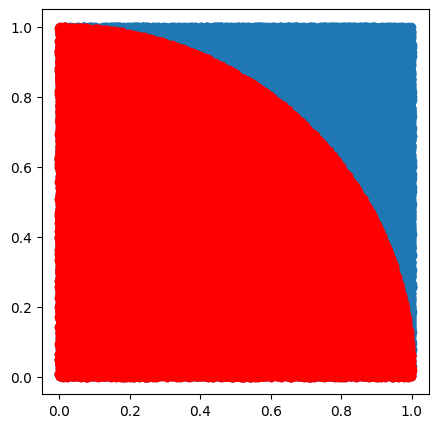

In [4]:
# veamos como se ve
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5)) # para que se vea redondo
plt.scatter(x_values, y_values)
plt.scatter(inside_x, inside_y, color="red")
plt.show()

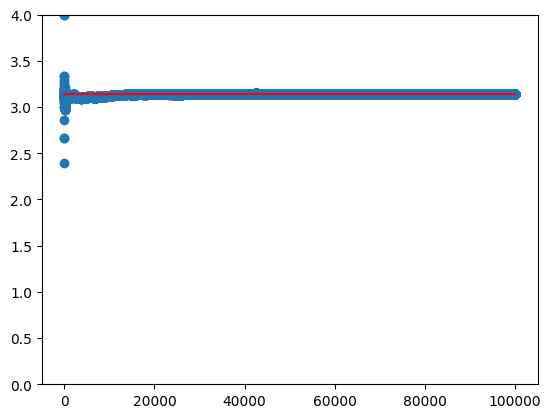

In [5]:
# Analicemos que tan rapido tiende
inside = 0
evol_pi = []
for i in range(len(x_values)): # y_values debe tener mismo tamaño para correr
    if x_values[i]**2+y_values[i]**2 <= 1:
        inside += 1
    evol_pi.append(4*inside/(i+1))
plt.scatter(list(range(n)),evol_pi)
plt.plot((0,n), (np.pi, np.pi), color="red")
plt.ylim(0,4)
plt.show()

Además del cálculo del área bajo la curva (integración), podemos realizar simulaciones de Monte Carlo para apreciar los distintos escenarios posibles, veamos un ejemplo:

#### Motivación: Juego del dado

Nuestro juego simple involucrará dos dados de seis caras. Para ganar, el jugador debe sacar el mismo número en ambos dados. Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

Digamos que nuestro jugador comienza con un saldo de mil pesos y está preparado para perderlo todo, por lo que apuesta un peso en cada tirada (lo que significa que se tiran ambos dados) y decide jugar mil tiradas. Debido a que la casa es **tan generosa**, ofrecen pagar 4 veces la apuesta del jugador, además del valor de la apuesta, cuando el jugador gana. Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en 4 pesos y finaliza la ronda con un saldo de 1.004. Si milagrosamente lograban una racha de mil victorias, podrían irse a casa con 5 mil pesos. Si perdían todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [6]:
# Packages
import matplotlib.pyplot as plt
import random
from collections import Counter

# Un ejemplo inicial para entender como funciona el lanzamiento de los dados
# y ve si se distribuyen de manera uniforme.
# Inicialización de dos listas vacías para almacenar los resultados de lanzamientos de dados
dados = []
# cantidad de experimentos
experimentos = 100
balance = []
for j in range(0, experimentos):
    dados.append([])
    balance.append([1000])
    # Bucle interno que se repite 1000 veces
    for i in range(0, 1000):
        money = balance[j][i]
        money -= 1
        dados[j].append((random.randint(1, 6), random.randint(1, 6)))
        if dados[j][i][0] == dados[j][i][1]:
            money += 5
        balance[j].append(money)
            
    # Utiliza Counter para contar la frecuencia
    conteo = Counter(dados[j])
    # Ordena el diccionario conteo por la clave (los números de 1 a 6) y convierte el resultado en un diccionario
    conteo_ordenado = dict(sorted(conteo.items(), key=lambda item: item[0]))
    # Imprime los diccionarios ordenados de conteo1 y conteo2
    print(conteo_ordenado)
    suma = 0
    for k in range(1,7):
        elem = (k,k)
        suma += conteo_ordenado[elem]
    print("Victorias:", suma) # solo para saber como deberia terminar el balance

{(1, 1): 24, (1, 2): 40, (1, 3): 25, (1, 4): 29, (1, 5): 27, (1, 6): 28, (2, 1): 34, (2, 2): 27, (2, 3): 34, (2, 4): 29, (2, 5): 29, (2, 6): 33, (3, 1): 21, (3, 2): 27, (3, 3): 30, (3, 4): 26, (3, 5): 22, (3, 6): 18, (4, 1): 28, (4, 2): 24, (4, 3): 27, (4, 4): 26, (4, 5): 30, (4, 6): 18, (5, 1): 24, (5, 2): 30, (5, 3): 30, (5, 4): 26, (5, 5): 31, (5, 6): 30, (6, 1): 33, (6, 2): 24, (6, 3): 26, (6, 4): 36, (6, 5): 26, (6, 6): 28}
Victorias: 166
{(1, 1): 21, (1, 2): 26, (1, 3): 30, (1, 4): 31, (1, 5): 30, (1, 6): 24, (2, 1): 27, (2, 2): 34, (2, 3): 26, (2, 4): 32, (2, 5): 26, (2, 6): 20, (3, 1): 25, (3, 2): 36, (3, 3): 30, (3, 4): 34, (3, 5): 27, (3, 6): 30, (4, 1): 39, (4, 2): 21, (4, 3): 27, (4, 4): 26, (4, 5): 20, (4, 6): 17, (5, 1): 28, (5, 2): 17, (5, 3): 17, (5, 4): 28, (5, 5): 34, (5, 6): 34, (6, 1): 31, (6, 2): 26, (6, 3): 28, (6, 4): 34, (6, 5): 38, (6, 6): 26}
Victorias: 171
{(1, 1): 31, (1, 2): 29, (1, 3): 26, (1, 4): 31, (1, 5): 23, (1, 6): 20, (2, 1): 29, (2, 2): 27, (2, 3):

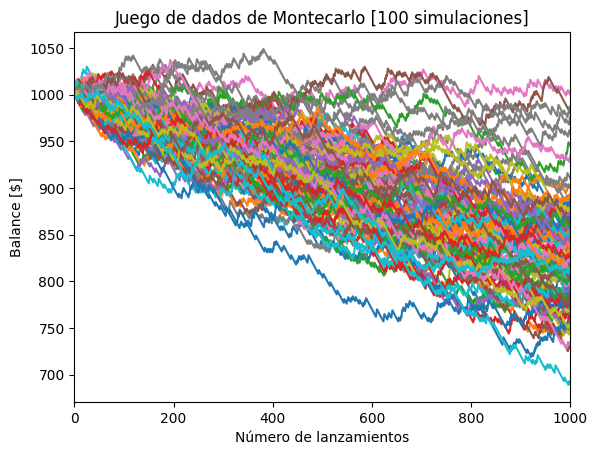

In [84]:
# Configura el título y etiquetas de los ejes del gráfico
plt.title("Juego de dados de Montecarlo [" + str(experimentos) + " simulaciones]")
plt.xlabel("Número de lanzamientos")
plt.ylabel("Balance [$]")
plt.xlim([0, 1000])  # Establece el límite del eje X al número máximo de lanzamientos
for i in range(experimentos):
    plt.plot(list(range(0,1001)), balance[i])

plt.show()

El gráfico nos permite apreciar que el escenario posible corresponde a que nuestro dinero tenderá a reducir.

#### Motivación: Teorema del valor medio para Integrales

El Teorema del Valor Medio para Integrales establece que si $f(x)$ es una función continua en el intervalo cerrado $[a, b]$, entonces existe al menos un punto $c$ en $[a, b]$ tal que:

$$ \int_a^b f(x) \, dx = f(c) \cdot (b - a) $$

En otras palabras, el área bajo la curva $f(x)$ desde $a$ hasta $b$ es igual al valor de la función en algún punto $c$ multiplicado por el ancho del intervalo $(b - a)$. Veamos si funciona en el mismo ejemplo de la circunferencia. Entonces

$$ f(x) = \sqrt{1 - x^2} $$

Veamos si el promedio de la evaluación función corresponde a $f(c)$.

In [89]:
exps = 1000000
suma = 0
funcion = lambda x: np.sqrt(1-x**2)
for i in range(exps):
    suma += funcion(np.random.random())
suma /= exps
suma *= 4
print(suma, np.pi)

3.1404844315529985 3.141592653589793


In [58]:
# proxima clase.... ahora si veremos los metodos numericos Monte Carlo